In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import os

save_path = "../analysis_outputs" # analizlerimi kaydedecğim klasör tek tek ekran resmi almaya üşendim 
os.makedirs(save_path, exist_ok=True)

In [2]:
df = pd.read_csv('../data/daily_food_nutrition_dataset.csv')
df.head()

,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,2024-09-11,496,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,Lunch,478
1,2024-12-17,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,Lunch,466
2,2024-06-09,776,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,Breakfast,635
3,2024-08-27,112,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,Snack,379
4,2024-07-28,622,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,Lunch,471


In [3]:
df.info() # null yok çok iyi 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   User_ID            10000 non-null  int64  
 2   Food_Item          10000 non-null  object 
 3   Category           10000 non-null  object 
 4   Calories (kcal)    10000 non-null  int64  
 5   Protein (g)        10000 non-null  float64
 6   Carbohydrates (g)  10000 non-null  float64
 7   Fat (g)            10000 non-null  float64
 8   Fiber (g)          10000 non-null  float64
 9   Sugars (g)         10000 non-null  float64
 10  Sodium (mg)        10000 non-null  int64  
 11  Cholesterol (mg)   10000 non-null  int64  
 12  Meal_Type          10000 non-null  object 
 13  Water_Intake (ml)  10000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 1.1+ MB


In [4]:
df.describe()

,User_ID,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,498.706300,327.693900,25.523050,52.568550,25.43735,4.986940,25.052570,497.969000,151.886600,554.353600
std,289.123477,158.194716,14.131993,27.387152,14.14532,2.864984,14.480605,287.988001,87.360643,260.977642
min,1.000000,50.000000,1.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,245.000000,190.000000,13.200000,28.800000,13.30000,2.500000,12.500000,249.750000,76.000000,327.000000
50%,492.000000,328.000000,25.500000,52.800000,25.30000,5.000000,25.000000,495.000000,153.000000,555.500000
75%,748.000000,464.000000,37.700000,76.400000,37.60000,7.500000,37.700000,749.000000,228.000000,783.000000
max,1000.000000,600.000000,50.000000,100.000000,50.00000,10.000000,50.000000,1000.000000,300.000000,1000.000000


In [5]:
#miss data var mı kontrol edelim
df.isnull().sum()

Date                 0
User_ID              0
Food_Item            0
Category             0
Calories (kcal)      0
Protein (g)          0
Carbohydrates (g)    0
Fat (g)              0
Fiber (g)            0
Sugars (g)           0
Sodium (mg)          0
Cholesterol (mg)     0
Meal_Type            0
Water_Intake (ml)    0
dtype: int64

In [6]:
#veride hiç null değer vs yok veri çok temiz o yüzden temizleme vs yapmıyoruz gerek yok cunku 
#eğerki veride nan değer cok olsaydı bunları temizlememiz gerekirdi burda cesitli yöntemler uygulayabilirdik 
#ortalamayı yerine koyma vs. gibi 

In [7]:
num_cols = [
    'Calories (kcal)',
    'Protein (g)',
    'Carbohydrates (g)',
    'Fat (g)',
    'Fiber (g)',
    'Sugars (g)',
    'Sodium (mg)',
    'Cholesterol (mg)',
    'Water_Intake (ml)'
] # burda sayısal değerde olanları analiz edeceğiz o yüzden sayısal olan sütunları aldım meal_type o yüzden yok burdaki değerlere göre grafik 
#çıkartacağız birazdan

In [8]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Calories (kcal),10000.0,327.69390,158.194716,50.0,190.00,328.0,464.0,600.0
Protein (g),10000.0,25.52305,14.131993,1.0,13.20,25.5,37.7,50.0
Carbohydrates (g),10000.0,52.56855,27.387152,5.0,28.80,52.8,76.4,100.0
Fat (g),10000.0,25.43735,14.145320,1.0,13.30,25.3,37.6,50.0
Fiber (g),10000.0,4.98694,2.864984,0.0,2.50,5.0,7.5,10.0
Sugars (g),10000.0,25.05257,14.480605,0.0,12.50,25.0,37.7,50.0
Sodium (mg),10000.0,497.96900,287.988001,0.0,249.75,495.0,749.0,1000.0
Cholesterol (mg),10000.0,151.88660,87.360643,0.0,76.00,153.0,228.0,300.0
Water_Intake (ml),10000.0,554.35360,260.977642,100.0,327.00,555.5,783.0,1000.0


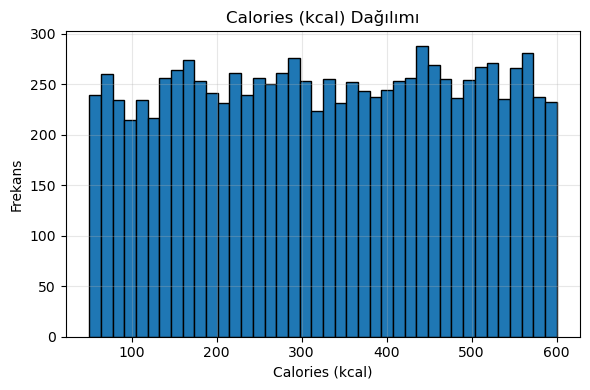

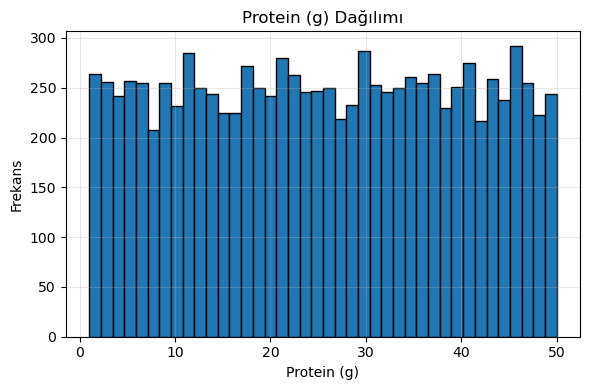

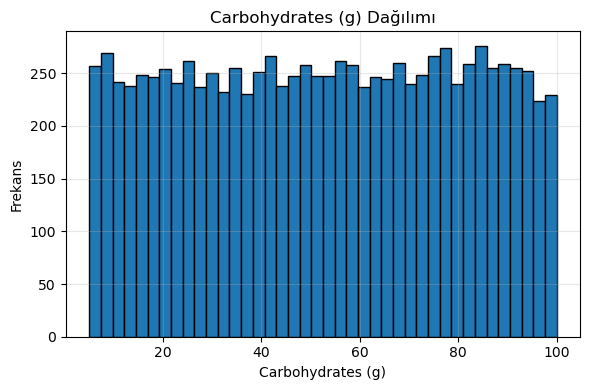

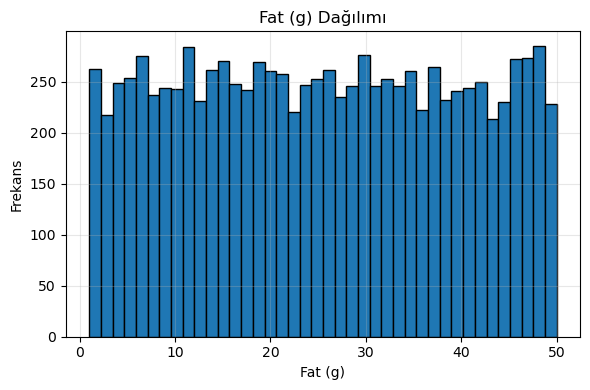

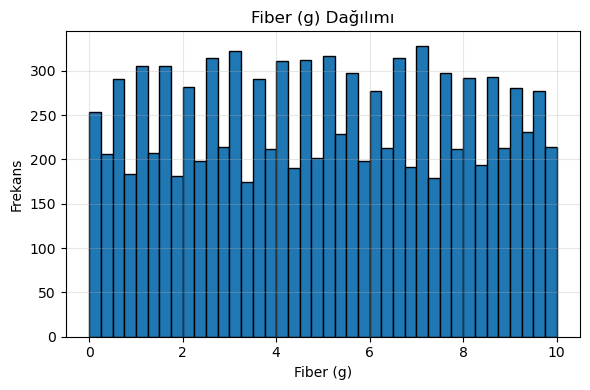

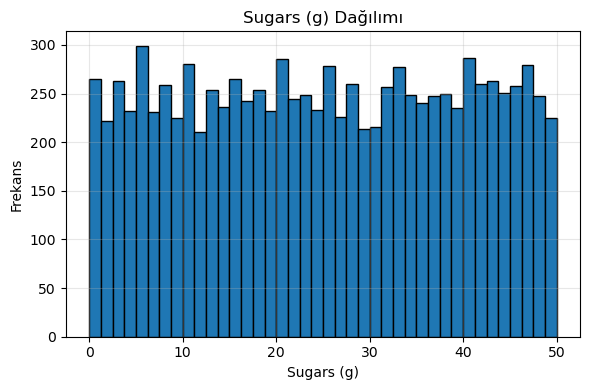

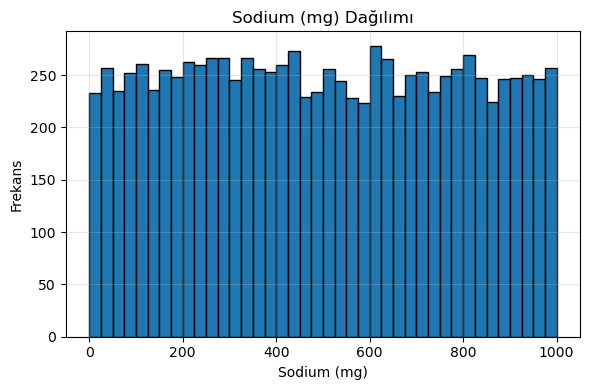

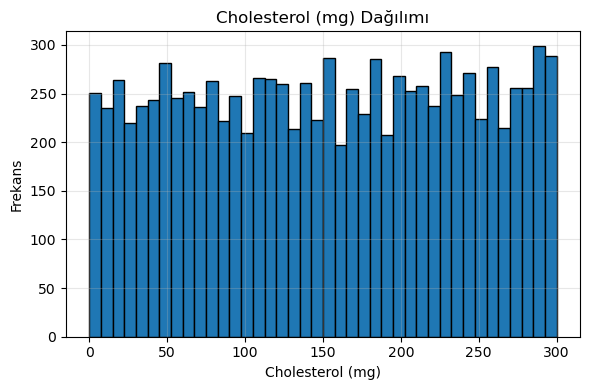

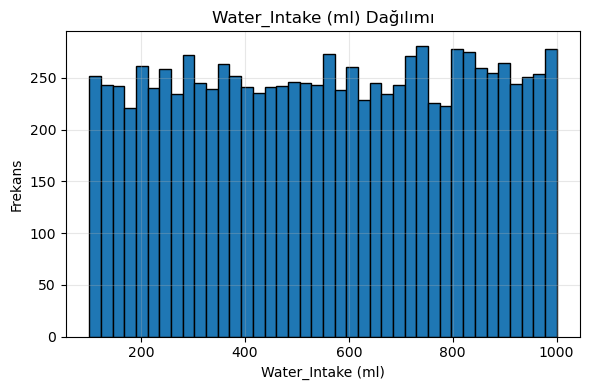

In [9]:
#önce histogram ile başlayalım  hocam hepsini analysis_outputs klasörüne kaydettim burda çok karmaşık oluyordu takip etmesi
for col in num_cols:
    plt.figure(figsize=(6,4))
    df[col].plot(kind='hist', bins=40, edgecolor='black')
    plt.title(f'{col} Dağılımı')
    plt.xlabel(col)
    plt.ylabel('Frekans')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    file_name = f"{col.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')}_histogram.png"
    plt.savefig(os.path.join(save_path, file_name), dpi=150, bbox_inches='tight')  # önce kaydet
    plt.show()
    plt.close() 

In [10]:
#histogram analizinde herşey homojen nerdeyse yani veri gayet iyi dağılmış bu da veri temiz ve dengeli demek

In [49]:
#korelasyon
import numpy as np
corr = df[num_cols].corr()
fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(corr.values, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_xticks(np.arange(len(num_cols))); ax.set_yticks(np.arange(len(num_cols)))
ax.set_xticklabels(num_cols, rotation=45, ha='right'); ax.set_yticklabels(num_cols)
ax.set_title('Besin Değerleri Korelasyon Isı Haritası')
fig.colorbar(im, ax=ax, label='Korelasyon')
fig.tight_layout()
fig.savefig(os.path.join(save_path, "correlation_heatmap.png"), dpi=150, bbox_inches='tight')
plt.show()
plt.close(fig)

In [50]:
#korelasyon diagonal oldu zaten böyle olmasını beklerdik çünkü set'te her değer bağımsız verilmiş mesela calori ile 
#prt - yağ gibi şeyler bir sayısal işlem üzerinden hesaplanıp bulunmamış bulunduysa bile bu söylenmemiş direkt kalori 
#olarak ayrı bir column verilmiş o yüzden bağımsız gibi çıktı 

In [55]:
#box plot
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot([df[c].dropna().values for c in num_cols], tick_labels=num_cols, showfliers=True)
ax.set_title('Besin Değerleri İçin Boxplot (Uç Değer Analizi)')
ax.set_ylabel('Değer')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(True, axis='y', alpha=0.3)
fig.tight_layout()
fig.savefig(os.path.join(save_path, "boxplot_outliers.png"), dpi=150, bbox_inches='tight')
plt.show()
plt.close(fig)

In [60]:
#burda fiber gibi değerler grafikte çok kücük kaldı bunun sebebi diğer featurelar calori vs. arası çok açık yanı mesela calori 600ken
#fiber kücük sayılar o yüzden grafik güzel okunmuyor bunu log dönüşümü veya 0-1 arası sabit ölçeklendirme ile görsel olarak düzeltebiliriz
#ben log ölçek dönüşümü yapcağım veriler vs değişmeyecek sadece görsel olarak daha düzgün ve okuması kolay bir grafiğimiz olacak sayısal farkları
#azaltacağız

In [61]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot([np.log1p(df[c].dropna().values) for c in num_cols], tick_labels=num_cols, showfliers=True)
ax.set_title('Besin Değerleri İçin Boxplot (Log Ölçeğinde)')
ax.set_ylabel('log(Değer)')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(True, axis='y', alpha=0.3)
fig.tight_layout()
fig.savefig(os.path.join(save_path, "boxplot_log_scaled.png"), dpi=150, bbox_inches='tight')
plt.show()
plt.close(fig)

In [63]:
#bu log scale sayesinde artık outlierlarımızı görebiliyoruz özellikle bazılarında belirgin outlierlar var
#suanlık sadece gözlemleyelim modeli eğitmeye başladıgımızda eğerki bu değerler yüzünden hatalar vs oluşmaya başlarsa
#artık bu değerleri ele alacağız ve bazı kararlar vereceğiz

In [65]:
#last meal_type analiz yapalım  bu kısım tagliydi ve saysıal değildi o yüzden ayrı bir incelem yapacağız bar kullandım
if 'Meal_Type' in df.columns:
    fig, ax = plt.subplots(figsize=(6,4))
    df.groupby('Meal_Type')['Calories (kcal)'].mean().plot(kind='bar', ax=ax)
    ax.set_title('Meal Type Bazında Ortalama Kalori')
    ax.set_ylabel('Ortalama Kalori (kcal)'); ax.set_xlabel('Meal Type')
    ax.grid(True, axis='y', alpha=0.3)
    fig.tight_layout()
    fig.savefig(os.path.join(save_path, "MealType_vs_Calories.png"), dpi=150, bbox_inches='tight')
    plt.show()
    plt.close(fig)
else:
    print("Meal_Type kolonu bulunamadı, bar grafiği atlandı.")

In [66]:
#veriler yemek türü olarak kalori bakımından eşit dağılmış güzel oldu bu 
#bu veri seti üzerinde yapılan analizlerde öğün tipinin kalori tahmini üzerindeki etkisi sınırlı olacak yani